<a href="https://colab.research.google.com/github/Munazza-Farees/edunet-virtual-internship/blob/main/Steganography_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Phase 1
# !pip install opencv-python numpy matplotlib pycryptodome

In [7]:
# !pip install tensorflow

In [8]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr

In [9]:
print(os.path.exists('/content/drive/MyDrive/CT_Medical_Images_Dataset/ID_0001_AGE_0069_CONTRAST_1_CT.png'))

True


Extracted message -> Patient ID: 8359304
PSNR: 87.79 dB


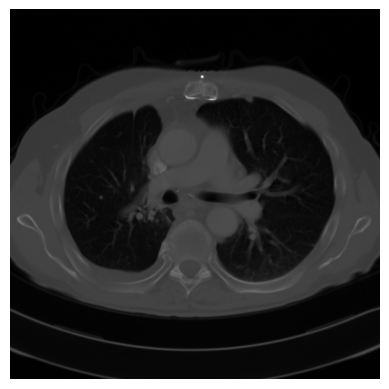

In [10]:

# Load image, embed, and evaluate
image_path = os.path.join('/content/drive/MyDrive/CT_Medical_Images_Dataset/ID_0001_AGE_0069_CONTRAST_1_CT.png')
cover = cv2.imread(image_path)
message = "Patient ID: 8359304"


def embed_lsb(image, message):
  if image is None:
    raise ValueError("Image is not loaded. Check the file path.")

  binary_msg = ''.join(format(ord(c), '08b') for c in message)

  img_flat = image.flatten()
  if len(binary_msg) > len(img_flat):
    raise ValueError("Message is too long to embed in the image.")

  for i in range(len(binary_msg)):
    img_flat[i] = (img_flat[i] & 0xFE) | int(binary_msg[i])
  return img_flat.reshape(image.shape)

def extract_lsb(image, msg_length):
  if image is None:
    raise ValueError("Image is not loaded. Check the file path.")

  img_flat = image.flatten()
  bits = [img_flat[i] & 1 for i in range(msg_length * 8)]
  return ''.join(chr(int(''.join(map(str, bits[i:i+8])), 2)) for i in range(0, len(bits), 8))

# Check if the image was loaded successfully
if cover is not None:
  try:
    stego = embed_lsb(cover, message)

    cv2.imwrite('stego.jpg', stego)
    extracted = extract_lsb(stego, len(message))

    psnr_value = psnr(cover, stego)

    print(f"Extracted message -> {extracted}")
    print(f"PSNR: {psnr_value:.2f} dB")
  except Exception as e:
    print(f"Error during processing: {e}")
else:
    print("Error: Image could not be loaded. Please check the file path.")

plt.imshow(cv2.cvtColor(cover, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

The key generated is d4d69bcc5b0de5f9ffd35e5d63395801655a94c95b9cca8b8e9393d1525a5f79
The original message is 'Patient ID: 8359304'
Encrypted message -> c7d28735a65c45a6e77f7156c1eca1147935ee14502038e845bdb551e77afc368a5dae7416e14bb8285054c929fe0abe
Decrypted message -> Patient ID: 8359304


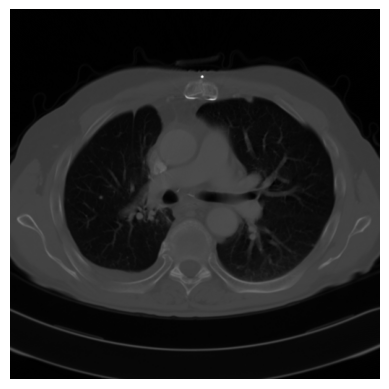

In [11]:
from Cryptodome.Cipher import AES
from Cryptodome.Random import get_random_bytes
from Cryptodome.Util.Padding import pad, unpad

def encrypt_message(message, key):
  cipher = AES.new(key, AES.MODE_CBC)
  # ct_bytes = cipher.encrypt(pad(message.encode(), AES.block_size))[:16]
  ct_bytes = cipher.encrypt(pad(message.encode(), AES.block_size))
  return cipher.iv + ct_bytes

def decrypt_message(ciphertext, key):
  iv = ciphertext[:16]
  ct = ciphertext[16:]
  cipher = AES.new(key, AES.MODE_CBC, iv)
  return unpad(cipher.decrypt(ct), AES.block_size).decode()

key = get_random_bytes(32)
message = "Patient ID: 8359304"

print(f"The key generated is {key.hex()}")
print(f"The original message is '{message}'")

encrypted = encrypt_message(message, key)
print(f"Encrypted message -> {encrypted.hex()}")
# binary_msg = ''.join(format(b, '08b') for b in encrypted)
stego = embed_lsb(cover, encrypted.hex())
cv2.imwrite('stego_encrypted.jpg', stego)
extracted = bytes.fromhex(extract_lsb(stego, len(encrypted.hex())))
decrypted = decrypt_message(extracted, key)
print(f"Decrypted message -> {decrypted}")

plt.imshow(cv2.cvtColor(stego, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.1585
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.1583
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.1559
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.1348
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 0.0684
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0111
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 0.0135
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0183
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0180
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 0.0166
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0163
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0154
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 0.0138
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0143
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0146
Epoch 16/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step 

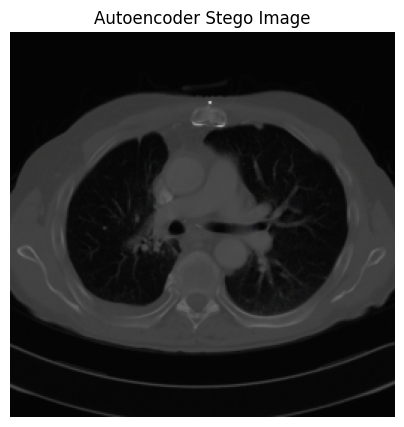

True

In [13]:
def build_autoencoder(img_shape=(256, 256, 3)):
    input_img = layers.Input(shape=img_shape)
    msg_input = layers.Input(shape=(128,))  # 128-bit message
    # Encoder
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Flatten()(x)
    x = layers.Concatenate()([x, msg_input])
    x = layers.Dense(256, activation='relu')(x)
    encoded = layers.Dense(np.prod(img_shape), activation='sigmoid')(x)
    decoded = layers.Reshape(img_shape)(encoded)
    # Model
    autoencoder = models.Model([input_img, msg_input], decoded)
    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder

# Prepare data
cover_dl = cv2.resize(cv2.imread('/content/drive/MyDrive/CT_Medical_Images_Dataset/ID_0001_AGE_0069_CONTRAST_1_CT.png'), (256, 256))
cover_dl = cover_dl.astype(np.float32) / 255.0
msg = np.random.randint(0, 2, 128)

autoencoder = build_autoencoder()
autoencoder.fit([np.array([cover_dl]), np.array([msg])], np.array([cover_dl]), epochs=100, batch_size=2, verbose=1)

# Save the model after training in the native Keras format
autoencoder.save("stego_autoencoder.keras")


# Predict and visualize
stego = autoencoder.predict([np.array([cover_dl]), np.array([msg])])[0]
stego = (stego * 255).astype(np.uint8)

plt.figure(figsize=(5, 5))
plt.imshow(cv2.cvtColor(stego, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Autoencoder Stego Image")
plt.show()

cv2.imwrite('stego_dl.jpg', cv2.cvtColor(stego, cv2.COLOR_RGB2BGR))

In [14]:
# Load the model saved in the native Keras format
autoencoder = load_model("/content/stego_autoencoder.keras")

# Load and preprocess another image
new_image = cv2.resize(cv2.imread("/content/drive/MyDrive/CT_Medical_Images_Dataset/ID_0004_AGE_0056_CONTRAST_1_CT.png"), (256, 256))
new_image = new_image.astype(np.float32) / 255.0

# Generate new random binary message
new_message = np.random.randint(0, 2, 128)

# Generate stego image
stego_output = autoencoder.predict([np.array([new_image]), np.array([new_message])])[0]
stego_output = (stego_output * 255).astype(np.uint8)

# Save or show the stego image
cv2.imwrite('stego_new.jpg', cv2.cvtColor(stego_output, cv2.COLOR_RGB2BGR))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


True

In [16]:
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim

psnr_val = psnr(new_image, stego_output, data_range=1.0)
print(f"PSNR: {psnr_val:.2f} dB")


ssim_val = ssim(new_image, stego_output, data_range=1.0, channel_axis=2)
print(f"SSIM: {ssim_val:.4f}")

PSNR: -23.15 dB
SSIM: 0.0762
